In [3]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [7]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime(2015, 4, 2)
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)


In [8]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,193.576048,195.216008,192.062846,193.785890,5.772710e+07,99.067734
std,183.097485,184.599509,182.139463,183.693380,2.405554e+07,14.412014
min,90.209999,90.699997,89.650002,90.279999,1.447960e+07,70.121497
25%,99.410004,100.680000,98.570000,99.620003,4.224620e+07,89.444262
50%,111.389999,112.480003,109.349998,110.379997,5.320460e+07,96.784559
75%,127.279999,128.399994,125.760002,127.040001,6.792940e+07,109.563976
max,649.900002,651.259979,644.470024,647.349983,1.899779e+08,128.430494


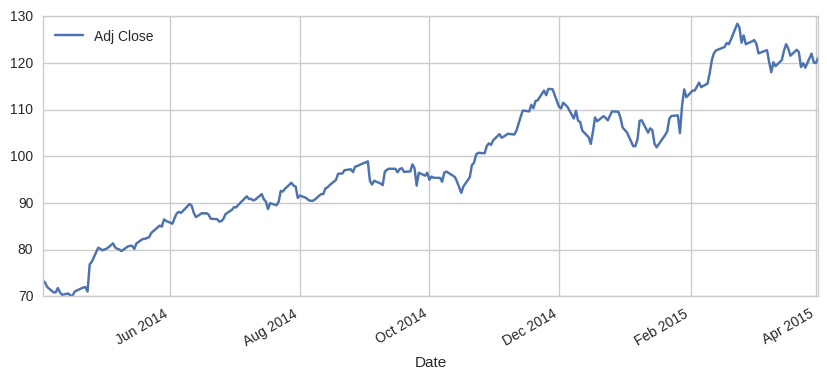

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

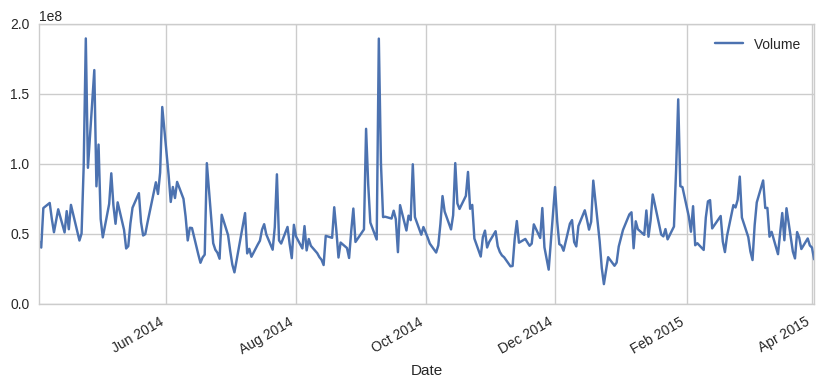

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/home/rafael/prj/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/rafael/prj/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/rafael/prj/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


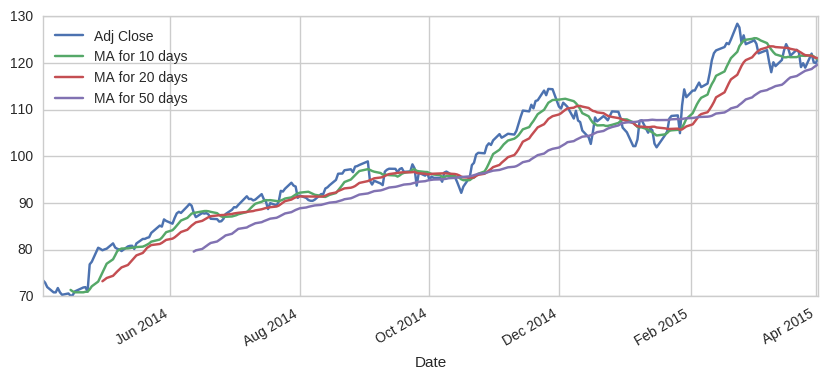

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

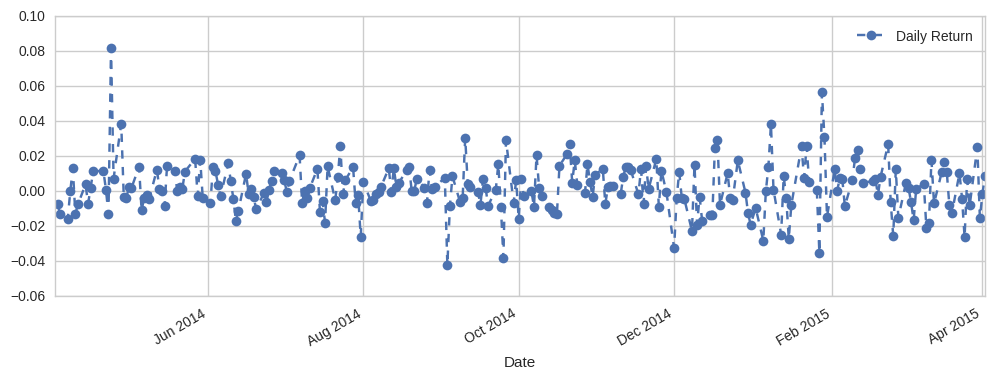

In [13]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

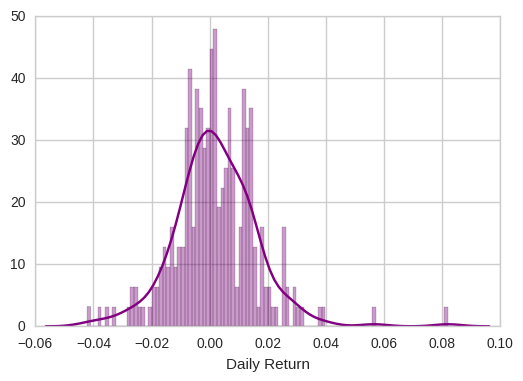

In [16]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

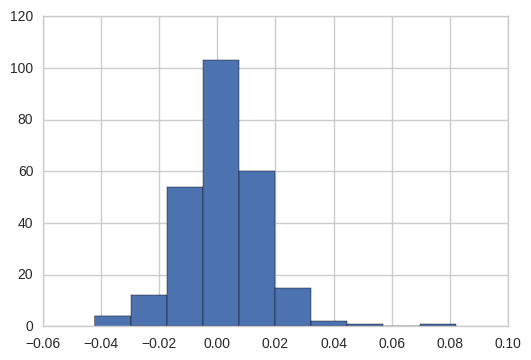

In [17]:
# Could have also done:
AAPL['Daily Return'].hist()

In [19]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [20]:
# Let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-04-02,73.450494,341.959991,567.002574,38.420779
2014-04-03,72.941467,333.619995,569.742571,38.104865
2014-04-04,71.997869,323.000000,543.142460,37.045622
2014-04-07,70.867439,317.760010,538.152456,36.980581
2014-04-08,70.863383,327.070007,554.902495,36.999165


In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

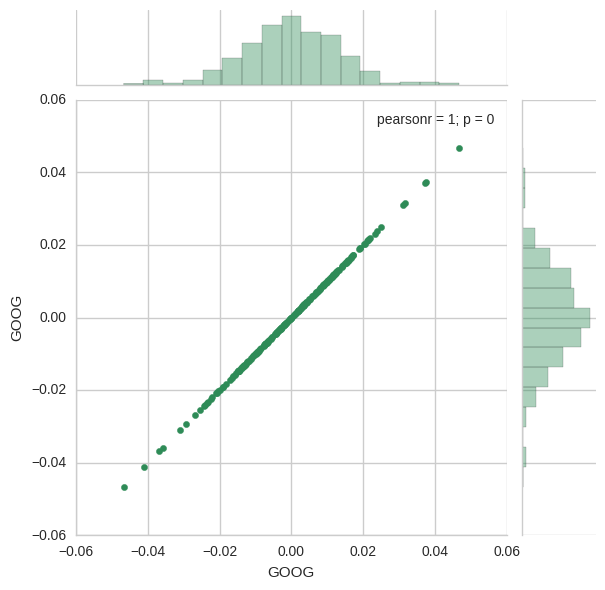

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

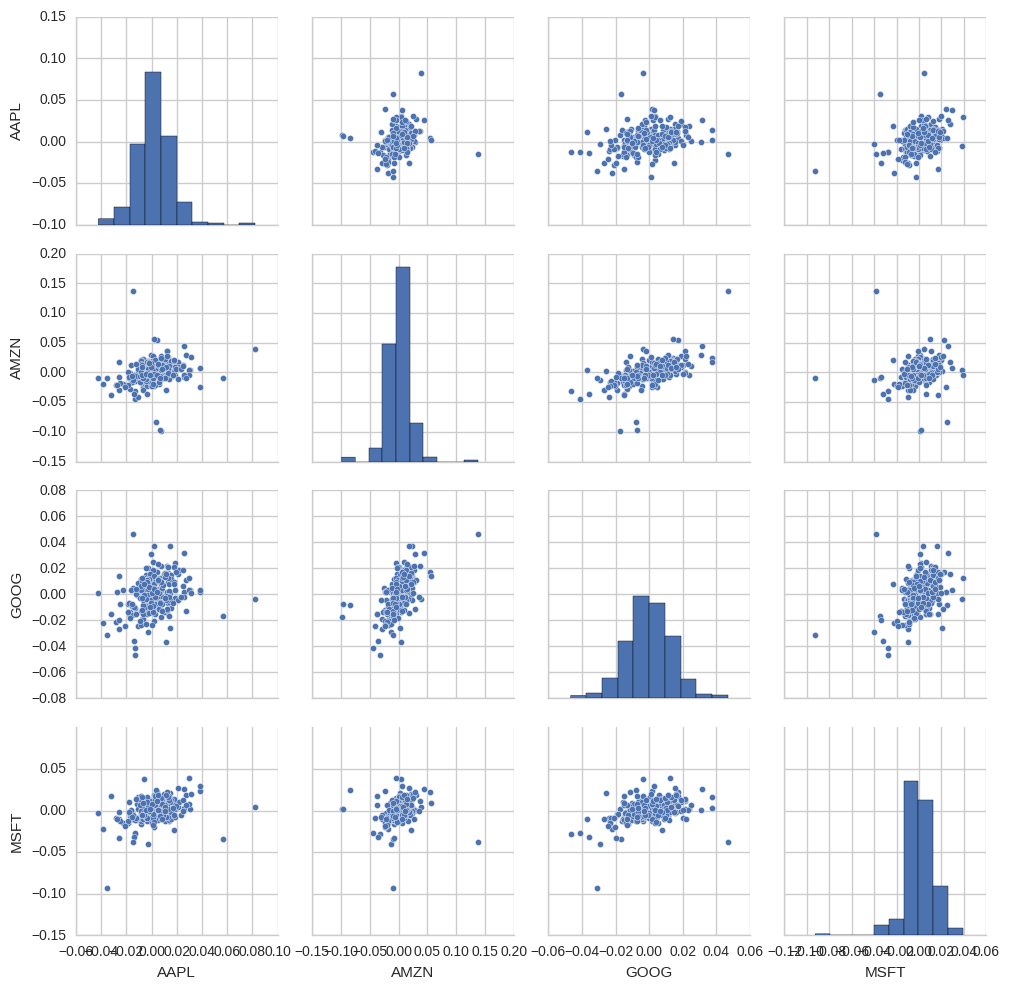

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())